#### 14 Oct 2024
#### Temas por revisar en este Notebook:

*   * Acuerdo con profesora guía:
*   * 1.Analizar las curvas del notebook Pruebas_Chile, usando valores absolutos y comparar
*   * 2.Validar los datos nuevamente y ver si explican bien la realidad

---


### Crear dataframe con la misma estructura que df, pero con los valores abolutos de las variables
*   1.Crear 'df_absoluto' con la misma estructura que 'df'
*   2.Crear lista con los nombres de los archivos en /notebooks/data/Annotated_Chile
*   3.Para cada elemento en los archivos de 'Annotated_Chile', llevarlo a un dataframe
*   4.Preprocesar los datos para asegurar que los valores de las etiquetas son nombres válidos de variables en el Manifesto Project dataset.
*
*   POBLAR DF_ABSOLUTOS
*   5.Hacer la matemática con las etiquetas
*   6.Crear 'df_absoluto' como copia de 'df'.
*   7.En 'df_absolutos' sólo dejar los registros de Chile y poner ceros en las variables 'per' 
*   8.En 'df_absolutos' agregar una columna 'num_frases'
*   8.En 'df_programas_Chile' contar las frases de cada programa y registrarlo en 'df_absoluto'  
*   6.Poblar 'df_absolutos', multiplicando los valores 'per' de 'df' por 'num_frases' 
*   7.Elegir un feature vector conveniente
*   8.Graficar con valores absolutos y comparar con gráficas hechas en base a % para el mismo feature vector
*   9.Concluir


#### Cargar librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import glob

#### Cargar archivos

#### Cargamos los programas *.csv en 'df_programas_Chile'

In [3]:
# Ruta a los archivos CSV
ruta_archivos = './data/Annotated_Chile/*.csv'

# Obtener la lista de archivos
archivos_csv = glob.glob(ruta_archivos)

# Verificar si se encontraron archivos
if not archivos_csv:
    print("No se encontraron archivos en la ruta especificada.")
else:
    print(f"Archivos encontrados: {archivos_csv}")

# Crear una lista para almacenar los DataFrames
dataframes = []

# Cargar los archivos al DataFrame
for archivo in archivos_csv:
    try:
        print(f"Leyendo archivo: {archivo}")
        df = pd.read_csv(
            archivo,
            encoding='utf-8',
            delimiter=',',
            skiprows=[1],  # Ignorar la primera fila después del encabezado
            names=['frase', 'frase_eng', 'cmp_code', 'eu_code'],  # Renombrar las columnas
            header=0,  # Ignorar los nombres originales de columnas
            keep_default_na=False,  # No interpretar valores como 'NA' como NaN
            na_values=[],  # No definir valores como NaN
            dtype={'cmp_code': str}  # Forzar la columna 'cmp_code' a tipo string
        )

        # Obtener el nombre del archivo sin ruta ni extensión
        nombre_archivo = archivo.split('/')[-1].replace('.csv', '')

        # Insertar la columna 'programa' como la primera columna
        df.insert(0, 'programa', nombre_archivo)

        # Agregar el DataFrame a la lista
        dataframes.append(df)
    except Exception as e:
        print(f"Error al leer {archivo}: {e}")

# Verificar si hay DataFrames para concatenar
if dataframes:
    df_programas_Chile = pd.concat(dataframes, ignore_index=True)
    print("DataFrame final:")
    print(df_programas_Chile.head())
else:
    print("No hay DataFrames para concatenar.")


Archivos encontrados: ['./data/Annotated_Chile/155021_200912.csv', './data/Annotated_Chile/155061_199312.csv', './data/Annotated_Chile/155601_200512.csv', './data/Annotated_Chile/155026_201711.csv', './data/Annotated_Chile/155980_201711.csv', './data/Annotated_Chile/155027_202111.csv', './data/Annotated_Chile/155620_198912.csv', './data/Annotated_Chile/155061_198912.csv', './data/Annotated_Chile/155501_201711.csv', './data/Annotated_Chile/155023_200912.csv', './data/Annotated_Chile/155201_201711.csv', './data/Annotated_Chile/155021_201311.csv', './data/Annotated_Chile/155021_199912.csv', './data/Annotated_Chile/155024_201311.csv', './data/Annotated_Chile/155021_201711.csv', './data/Annotated_Chile/155025_200512.csv', './data/Annotated_Chile/155061_202111.csv', './data/Annotated_Chile/155062_202111.csv', './data/Annotated_Chile/155061_200912.csv', './data/Annotated_Chile/155021_199312.csv', './data/Annotated_Chile/155025_200912.csv', './data/Annotated_Chile/155201_202111.csv', './data/A

### Preproceso a 'df_programas_Chile'
* Buscamos valores 'NaN', o Missing values, en la columna 'cmp_code' que es la que contiene los nombres de las etiquetas
* Eliminamos la columna 'eu_code' que no será utilizada

In [4]:
df_programas_Chile

,programa,frase,frase_eng,cmp_code,eu_code
0,155021_200912,La campaña presidencial es una buena oportunid...,The presidential campaign is a good opportunit...,305.1,NA
1,155021_200912,Y así lo hemos hecho.,And so we have.,305.1,NA
2,155021_200912,Hemos vuelto a recorrer el país de norte a sur.,We have again toured the country from north to...,305.1,NA
3,155021_200912,Mis equipos de trabajo han recogido las inquie...,My work teams have gathered the concerns of pe...,305.1,NA
4,155021_200912,Hemos recopilado historias de vida de miles de...,We have collected life stories of thousands of...,305.1,NA
...,...,...,...,...,...
56935,155030_202111,Participaremos de modo incidente de organizaci...,We will participate incidentally with women's ...,503,NA
56936,155030_202111,5.4.5.Impulsaremos que la construcción de los ...,5.4.5.We will promote the incorporation of gen...,H,NA
56937,155030_202111,Propiciaremos que se desarrolle el carnet de i...,We will promote the development of the gender-...,604,NA
56938,155030_202111,Propiciaremos que el Ministerio Público cuente...,We will promote that the Public Prosecutor's O...,605.1,NA


#### Eliminamos la columna 'eu_code'. No la usaremos

In [5]:
df_programas_Chile = df_programas_Chile.drop(columns=['eu_code'])
df_programas_Chile.head()

,programa,frase,frase_eng,cmp_code
0,155021_200912,La campaña presidencial es una buena oportunid...,The presidential campaign is a good opportunit...,305.1
1,155021_200912,Y así lo hemos hecho.,And so we have.,305.1
2,155021_200912,Hemos vuelto a recorrer el país de norte a sur.,We have again toured the country from north to...,305.1
3,155021_200912,Mis equipos de trabajo han recogido las inquie...,My work teams have gathered the concerns of pe...,305.1
4,155021_200912,Hemos recopilado historias de vida de miles de...,We have collected life stories of thousands of...,305.1


##### Revisamos la existencia de valores 'no string' que aún puedan quedar en 'cmp_code'

In [6]:
# Count the occurrences of non-string values in the 'cmp_code' column
non_string_count = df_programas_Chile['cmp_code'].apply(lambda x: not isinstance(x, str)).sum()

print(f"Number of non-string values in 'cmp_code': {non_string_count}")

Number of non-string values in 'cmp_code': 0


##### Revisamos qué valores únicos quedan en 'cmp_code' para eliminar cualquier valor que no parezca un nombre de alguna de las variables

In [7]:
unique_cmp_code_values = df_programas_Chile['cmp_code'].unique()
unique_cmp_code_count = len(unique_cmp_code_values)

print(f"Unique values in 'cmp_code': {unique_cmp_code_values}")
print(f"Number of unique values in 'cmp_code': {unique_cmp_code_count}")

Unique values in 'cmp_code': ['305.1' '204' 'NA' '202.1' '303' '304' '301' '502' '305.6' '201.2'
 '606.1' '107' '202.4' '607.3' '503' '202.3' '106' '108' '104' '105' '410'
 '416.2' '701' '706' '506' '403' '402' '501' '414' '411' '703.1' '413'
 '504' '605.1' '605.2' '705' '505' '201.1' '305.4' '603' '203' '401' '405'
 '407' '109' '102' '305.2' '604' '704' '404' '101' '408' '606.2' 'H'
 '305.5' '602.1' '607.1' '415' '601.1' '103.1' '416.1' '607.2' '412' '409'
 '202.2' '602.2' '000' '702' '305.3' '103.2' '601.2' '406' '302' '110'
 '608.3' '507' '608.1' '608.2' '703.2']
Number of unique values in 'cmp_code': 79


##### Identificamos los registros en que 'cmp_code' == 'H' ó 'NA'. Dejaremos las ocurrencias de 'cmp_code' == '000'.

In [8]:
# Filter rows where cmp_code is 'NA' or 'H'
filtered_rows = df_programas_Chile[(df_programas_Chile['cmp_code'] == 'NA') | (df_programas_Chile['cmp_code'] == 'H')]

# Print the desired columns
for index, row in filtered_rows.iterrows():
    print(f"Row: {index}, Programa: {row['programa']}, Frase: {row['frase']}, CMP Code: {row['cmp_code']}")

Row: 67, Programa: 155021_200912, Frase: 1)  Impulsando una mejor democracia y un mejor Estado, CMP Code: NA
Row: 90, Programa: 155021_200912, Frase: HACIA UNA CONSTITUCIÓN DE TODOS, CMP Code: NA
Row: 107, Programa: 155021_200912, Frase: HACIA LA DIGNIFICACIÓN DE LA POLÍTICA Y EL SERVICIO PÚBLICO, CMP Code: NA
Row: 138, Programa: 155021_200912, Frase: HACIA UN PAÍS DESCENTRALIZADO Y CON GESTIÓN LOCAL, CMP Code: NA
Row: 155, Programa: 155021_200912, Frase: HACIA UNA REFORMA DEL ESTADO PARA FORTALECER EL ESTADO, CMP Code: NA
Row: 165, Programa: 155021_200912, Frase: HACIA MEJORES POLÍTICAS PÚBLICAS, CMP Code: NA
Row: 178, Programa: 155021_200912, Frase: HACIA UNA CULTURA DEL DIÁLOGO SOCIAL, CMP Code: NA
Row: 190, Programa: 155021_200912, Frase: HACIA UN PAÍS CON MEMORIA Y VERDAD, CMP Code: NA
Row: 208, Programa: 155021_200912, Frase: HACIA UN PAÍS DE VOLUNTARIOS PÚBLICOS, CMP Code: NA
Row: 224, Programa: 155021_200912, Frase: HACIA UNA MAYOR INTEGRACIÓN CON MUNDO MULTILATERAL, CMP Code: 

##### Vamos a eliminar los registros con 'cmp_code' == 'NA' ó 'H'. Los '000' los dejaremos porque pueden ser útiles después. 

In [9]:
# Count the number of rows to be removed
rows_to_remove = df_programas_Chile[(df_programas_Chile['cmp_code'] == 'NA') | (df_programas_Chile['cmp_code'] == 'H')].shape[0]

# Remove the rows
df_programas_Chile = df_programas_Chile[~((df_programas_Chile['cmp_code'] == 'NA') | (df_programas_Chile['cmp_code'] == 'H'))]

# Print the number of rows removed
print(f"Number of rows removed: {rows_to_remove}")

# Print the final number of rows
print(f"Final number of rows: {df_programas_Chile.shape[0]}")

Number of rows removed: 4095
Final number of rows: 52845


##### Reemplazamos los '.' en 'cmp_code' por un '_' para consistencia con el dataset del manifesto project

In [10]:
# Replace '.' with '_' in the 'cmp_code' column
df_programas_Chile['cmp_code'] = df_programas_Chile['cmp_code'].str.replace('.', '_', regex=False)

# Display the first few rows to verify the changes
df_programas_Chile.head()

,programa,frase,frase_eng,cmp_code
0,155021_200912,La campaña presidencial es una buena oportunid...,The presidential campaign is a good opportunit...,305_1
1,155021_200912,Y así lo hemos hecho.,And so we have.,305_1
2,155021_200912,Hemos vuelto a recorrer el país de norte a sur.,We have again toured the country from north to...,305_1
3,155021_200912,Mis equipos de trabajo han recogido las inquie...,My work teams have gathered the concerns of pe...,305_1
4,155021_200912,Hemos recopilado historias de vida de miles de...,We have collected life stories of thousands of...,305_1


##### Exportamos a un archivo excel

In [11]:
# Export df_programas_Chile to an Excel file
output_file_path = 'df_programas_Chile.xlsx'
df_programas_Chile.to_excel(output_file_path, index=False)
print(f"DataFrame exported to {output_file_path}")

DataFrame exported to df_programas_Chile.xlsx


##### Aseguramos que todos los valores en 'cmp_code' corresponde a nombres válidos de variables en el dataset de manifesto project. Estas variables están en el archivo 'Analytical_Data' 

In [12]:
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
df_AD.head()

,Dominio,Nombre_Dominio,Variable_per,Detalle_Dominio
0,Domain_1,External Relations,per101,Foreign Special Relationships: Positive
1,Domain_1,External Relations,per102,Foreign Special Relationships: Negative
2,Domain_1,External Relations,per103,Anti-Imperialism
3,Domain_1,External Relations,per104,Military: Positive
4,Domain_1,External Relations,per105,Military: Negative


In [13]:
# Iterar sobre los valores únicos de 'cmp_code' en 'df_programas_Chile'
for cmp_code in unique_cmp_code_values:
    # Anteponer 'per' al valor de 'cmp_code'
    per_code = f'per{cmp_code}'
    
    # Buscar el valor en la columna 'Variable_per' de 'df_AD'
    if per_code not in df_AD['Variable_per'].values:
        # Filtrar las filas correspondientes en 'df_programas_Chile'
        filtered_rows = df_programas_Chile[df_programas_Chile['cmp_code'] == cmp_code]
        
        # Imprimir la línea, programa y cmp_code
        for index, row in filtered_rows.iterrows():
            print(f"Línea: {index}, Programa: {row['programa']}, CMP Code: {row['cmp_code']}")

Línea: 6989, Programa: 155026_201711, CMP Code: 000
Línea: 7012, Programa: 155026_201711, CMP Code: 000
Línea: 7036, Programa: 155026_201711, CMP Code: 000
Línea: 7085, Programa: 155980_201711, CMP Code: 000
Línea: 7086, Programa: 155980_201711, CMP Code: 000
Línea: 7547, Programa: 155980_201711, CMP Code: 000
Línea: 7806, Programa: 155980_201711, CMP Code: 000
Línea: 9241, Programa: 155027_202111, CMP Code: 000
Línea: 10803, Programa: 155027_202111, CMP Code: 000
Línea: 16155, Programa: 155201_201711, CMP Code: 000
Línea: 28559, Programa: 155061_202111, CMP Code: 000
Línea: 28560, Programa: 155061_202111, CMP Code: 000
Línea: 28561, Programa: 155061_202111, CMP Code: 000
Línea: 28562, Programa: 155061_202111, CMP Code: 000
Línea: 28564, Programa: 155061_202111, CMP Code: 000
Línea: 28565, Programa: 155061_202111, CMP Code: 000
Línea: 28571, Programa: 155061_202111, CMP Code: 000
Línea: 28727, Programa: 155061_202111, CMP Code: 000
Línea: 28728, Programa: 155061_202111, CMP Code: 000
L

##### Sólo encontró los registros con '000'; es decir, todos los demás son nombres válidos de variables.

In [14]:
df_programas_Chile

,programa,frase,frase_eng,cmp_code
0,155021_200912,La campaña presidencial es una buena oportunid...,The presidential campaign is a good opportunit...,305_1
1,155021_200912,Y así lo hemos hecho.,And so we have.,305_1
2,155021_200912,Hemos vuelto a recorrer el país de norte a sur.,We have again toured the country from north to...,305_1
3,155021_200912,Mis equipos de trabajo han recogido las inquie...,My work teams have gathered the concerns of pe...,305_1
4,155021_200912,Hemos recopilado historias de vida de miles de...,We have collected life stories of thousands of...,305_1
...,...,...,...,...
56934,155030_202111,Desarrollaremos la investigación de las necesi...,We will develop research on the needs of careg...,504
56935,155030_202111,Participaremos de modo incidente de organizaci...,We will participate incidentally with women's ...,503
56937,155030_202111,Propiciaremos que se desarrolle el carnet de i...,We will promote the development of the gender-...,604
56938,155030_202111,Propiciaremos que el Ministerio Público cuente...,We will promote that the Public Prosecutor's O...,605_1


##### Revisión final de 'df_programas_Chile' buscando valores 'nan', 'NA', 'H', 'Missing values'

In [15]:
# Define the list of values to count
values_to_count = ['nan', 'NA', 'NAN', 'H', 'Missing values']

# Count the occurrences of each value in the 'cmp_code' column
occurrences = df_programas_Chile['cmp_code'].isin(values_to_count).sum()

print(f"Occurrences of specified values in 'cmp_code': {occurrences}")

Occurrences of specified values in 'cmp_code': 0


*   DF_ABSOLUTOS
*   5.Duplicamos 'df_Manifesto_Project' en 'df_absolutos'
*   6.xdc
*   7.En 'df_absolutos' sólo dejar los registros de Chile y poner ceros en las variables 'per' 
*   8.En 'df_absolutos' agregar una columna 'num_frases'
*   9.En 'df_programas_Chile' contar las frases de cada programa y registrarlo en 'df_absoluto'  
*   10.Poblar 'df_absolutos', multiplicando los valores 'per' de 'df' por 'num_frases' 
*   11.Elegir un feature vector conveniente
*   12.Graficar con valores absolutos y comparar con gráficas hechas en base a % para el mismo feature vector
*   13.Concluir

#### Creamos df_absolutos

#### Cargamos el dataset de Manifesto Project

In [16]:
file_path = "data/MPDataset_MPDS2024a.csv"
df_Manifesto_project = pd.read_csv(file_path)
df_Manifesto_project.shape

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_1111/2392630412.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Manifesto_project = pd.read_csv(file_path)


(5151, 175)

In [17]:
df_absolutos = df_Manifesto_project.copy()

#### Dejamos sólo registros de Chile

In [18]:
# Delete all records where 'countryname' is not 'Chile'
df_absolutos = df_absolutos[df_absolutos['countryname'] == 'Chile']
df_absolutos.head()

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
4895,155,Chile,10,0,14/12/1989,198912,155021,Concert of Parties for Democracy,NaN,20,...,0.0,2.165,0.0,-15.152,4.205,3.958,12.369,1.855,2024a,LS71MA
4896,155,Chile,10,0,14/12/1989,198912,155061,Democracy and Progress,NaN,60,...,0.0,1.171,0.0,21.405,0.167,8.863,7.692,1.672,2024a,SQXTCB
4897,155,Chile,10,0,14/12/1989,198912,155620,Liberal-Socialists of Chile,NaN,60,...,0.0,0.000,0.0,-3.968,3.968,6.349,29.365,0.000,2024a,2IDQNL
4898,155,Chile,10,0,11/12/1993,199312,155021,Concert of Parties for Democracy,NaN,20,...,0.0,2.001,0.0,-10.493,5.368,3.758,13.860,0.537,2024a,6B4L5M
4899,155,Chile,10,0,11/12/1993,199312,155061,Union for Chile's Progress,NaN,60,...,0.0,5.044,0.0,25.347,1.513,15.385,7.818,0.252,2024a,X97LN2


In [19]:
df_absolutos.shape

(30, 175)

#### Debemos homologar el nombre del programa en ambos dataframe y validar que los pares partido_fecha existen en ambos dataframe

In [20]:
df_programas_Chile

,programa,frase,frase_eng,cmp_code
0,155021_200912,La campaña presidencial es una buena oportunid...,The presidential campaign is a good opportunit...,305_1
1,155021_200912,Y así lo hemos hecho.,And so we have.,305_1
2,155021_200912,Hemos vuelto a recorrer el país de norte a sur.,We have again toured the country from north to...,305_1
3,155021_200912,Mis equipos de trabajo han recogido las inquie...,My work teams have gathered the concerns of pe...,305_1
4,155021_200912,Hemos recopilado historias de vida de miles de...,We have collected life stories of thousands of...,305_1
...,...,...,...,...
56934,155030_202111,Desarrollaremos la investigación de las necesi...,We will develop research on the needs of careg...,504
56935,155030_202111,Participaremos de modo incidente de organizaci...,We will participate incidentally with women's ...,503
56937,155030_202111,Propiciaremos que se desarrolle el carnet de i...,We will promote the development of the gender-...,604
56938,155030_202111,Propiciaremos que el Ministerio Público cuente...,We will promote that the Public Prosecutor's O...,605_1


#### Aseguremos que para cada programa em 'df_programas_Chile' existe en 'df_absolutos' un registro con el mismo 'party'_'date' 

In [21]:
# Extract unique values of 'programa' from 'df_programas_Chile'
unique_programas = df_programas_Chile['programa'].unique()

# Initialize a list to store warnings
warnings = []

# Iterate over unique values of 'programa'
for programa in unique_programas:
    # Extract the leftmost 6 characters and rightmost 6 characters
    left_6 = programa[:6]
    right_6 = programa[-6:]
    
    # Validate if 'party' and 'date' exist in 'df_absolutos'
    if not ((df_absolutos['party'] == int(left_6)) & (df_absolutos['date'] == int(right_6))).any():
        warnings.append(f"Warning: No matching row found for 'party' == {left_6} and 'date' == {right_6}")

# Print warnings if any
for warning in warnings:
    print(warning)

In [22]:
df_absolutos.head()

,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
4895,155,Chile,10,0,14/12/1989,198912,155021,Concert of Parties for Democracy,NaN,20,...,0.0,2.165,0.0,-15.152,4.205,3.958,12.369,1.855,2024a,LS71MA
4896,155,Chile,10,0,14/12/1989,198912,155061,Democracy and Progress,NaN,60,...,0.0,1.171,0.0,21.405,0.167,8.863,7.692,1.672,2024a,SQXTCB
4897,155,Chile,10,0,14/12/1989,198912,155620,Liberal-Socialists of Chile,NaN,60,...,0.0,0.000,0.0,-3.968,3.968,6.349,29.365,0.000,2024a,2IDQNL
4898,155,Chile,10,0,11/12/1993,199312,155021,Concert of Parties for Democracy,NaN,20,...,0.0,2.001,0.0,-10.493,5.368,3.758,13.860,0.537,2024a,6B4L5M
4899,155,Chile,10,0,11/12/1993,199312,155061,Union for Chile's Progress,NaN,60,...,0.0,5.044,0.0,25.347,1.513,15.385,7.818,0.252,2024a,X97LN2


#### En 'df_absolutos', cada columna 'per' que representa una variable que nos interesa, la multiplicamos por la columna 'total'

In [23]:
# Create a list of column names that begin with 'per' and have a digit or an underscore in position 4
variables_per = [col for col in df_absolutos.columns if col.startswith('per') and (col[3].isdigit() or col[3] == '_')]

print(f"Total variables per: {len(variables_per)}")

Total variables per: 142


In [24]:
# Multiplicar cada columna en 'variables_per' por el valor en la columna 'total y dividir por 100'
for col in variables_per:
    df_absolutos[col] = (df_absolutos[col] * df_absolutos['total'] / 100).round(0).astype(int)
df_absolutos.head()


,country,countryname,oecdmember,eumember,edate,date,party,partyname,partyabbrev,parfam,...,per608_3,per703_1,per703_2,rile,planeco,markeco,welfare,intpeace,datasetversion,id_perm
4895,155,Chile,10,0,14/12/1989,198912,155021,Concert of Parties for Democracy,NaN,20,...,0,35,0,-15.152,4.205,3.958,12.369,1.855,2024a,LS71MA
4896,155,Chile,10,0,14/12/1989,198912,155061,Democracy and Progress,NaN,60,...,0,7,0,21.405,0.167,8.863,7.692,1.672,2024a,SQXTCB
4897,155,Chile,10,0,14/12/1989,198912,155620,Liberal-Socialists of Chile,NaN,60,...,0,0,0,-3.968,3.968,6.349,29.365,0.000,2024a,2IDQNL
4898,155,Chile,10,0,11/12/1993,199312,155021,Concert of Parties for Democracy,NaN,20,...,0,41,0,-10.493,5.368,3.758,13.860,0.537,2024a,6B4L5M
4899,155,Chile,10,0,11/12/1993,199312,155061,Union for Chile's Progress,NaN,60,...,0,40,0,25.347,1.513,15.385,7.818,0.252,2024a,X97LN2


In [25]:
# Export df_absolutos to an Excel file
output_file_path = 'df_absolutos.xlsx'
df_absolutos.to_excel(output_file_path, index=False)
print(f"DataFrame exported to {output_file_path}")

DataFrame exported to df_absolutos.xlsx


#### Unificamos el nombre de S. Piñera

In [26]:
# Corrige nombre de Se
# Count the number of changes
count_changes = df_absolutos.loc[df_absolutos['candidatename'].notna() & df_absolutos['candidatename'].str.contains('Piñera'), 'candidatename'].count()

# Replace the values
df_absolutos.loc[df_absolutos['candidatename'].notna() & df_absolutos['candidatename'].str.contains('Piñera'), 'candidatename'] = 'Sebastián Piñera Echeñique'
print(f"Number of changes: {count_changes}")

Number of changes: 3


#### Agregamos el 'agno' de la elección

In [27]:
# Insert column 'agno' into the dataframe, of type int, to the right of column 'date'
df_absolutos.insert(df_absolutos.columns.get_loc('date') + 1, 'agno', df_absolutos['edate'].str[-4:].astype(int))

unique_agno_values = df_absolutos['agno'].unique()
unique_agno_values

/var/folders/v8/d2xyhw9n7pb9rqd7k0d1xfsc0000gn/T/ipykernel_1111/1274501083.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_absolutos.insert(df_absolutos.columns.get_loc('date') + 1, 'agno', df_absolutos['edate'].str[-4:].astype(int))


array([1989, 1993, 1999, 2005, 2009, 2013, 2017, 2021])

#### Modifiquemos el nombre de 'df_resultados' y lo dejamos como 'df_absolutos_Chile'

In [28]:
df_absolutos_Chile = df_absolutos


#### Ordenamos por año y luego ponderamos por 'pervote'. Obtenemos 'df_absolutos_Chile_ponderado'

In [29]:
# Ordenemos por 'agno'
df_absolutos_Chile = df_absolutos_Chile.sort_values(by='agno')

# Group by column 'agno' and calculate the weighted average of each column in 'variables_per' using column 'presvote' as weights
df_absolutos_Chile_ponderados = df_absolutos_Chile.groupby('agno').apply(
    lambda x: pd.Series({col: np.average(x[col], weights=x['presvote']) for col in variables_per})
).reset_index()

# Display the results
df_absolutos_Chile_ponderados.head()

,agno,per101,per102,per103,per104,per105,per106,per107,per108,per109,...,per606_1,per606_2,per607_1,per607_2,per607_3,per608_1,per608_2,per608_3,per703_1,per703_2
0,1989,3.934500,0.294000,3.3102,25.225800,13.019400,6.177600,56.999400,12.76170,5.295600,...,13.865100,4.413600,5.5170,0.000000,2.206800,0.0,0.0,0.0,21.367500,0.0
1,1993,3.592548,0.296274,0.0000,13.259012,4.222357,3.814905,57.297488,14.77825,0.296274,...,36.371404,2.814905,0.0000,1.407452,0.703726,0.0,0.0,0.0,40.703726,0.0
2,1999,0.513000,1.461000,0.0000,28.097000,3.591000,1.026000,15.175000,3.51300,0.000000,...,16.026000,0.000000,4.5130,0.000000,11.130000,0.0,0.0,0.0,23.636000,0.0
3,2005,10.905300,0.000000,0.4860,25.757100,13.392600,7.196100,46.265900,11.74800,9.791700,...,17.225300,11.380800,3.6768,0.919200,23.285700,0.0,0.0,0.0,16.192800,0.0
4,2009,0.062100,0.000000,1.9251,17.479400,5.491600,0.296000,26.876300,11.66700,0.751100,...,5.727500,0.000000,0.0000,0.440600,36.324900,0.0,0.0,0.0,26.568400,0.0


In [30]:
# Export df_absolutos_Chile_ponderados to an Excel file
output_file_path = 'df_absolutos_Chile_ponderados.xlsx'
df_absolutos_Chile_ponderados.to_excel(output_file_path, index=False)
print(f"DataFrame exported to {output_file_path}")

DataFrame exported to df_absolutos_Chile_ponderados.xlsx


#### Cargamos 'df_porcentual_Chile_ponderado' para hacer un gráfico conjunto con 'df_absolutos_Chile_ponderados'

In [31]:
df_porcentual_Chile_ponderados = pd.read_excel('df_porcentual_Chile_ponderados.xlsx')
df_porcentual_Chile_ponderados.head()

,agno,per101,per102,per103,per104,per105,per106,per107,per108,per109,...,per606_1,per606_2,per607_1,per607_2,per607_3,per608_1,per608_2,per608_3,per703_1,per703_2
0,1989,0.367161,0.049098,0.204681,2.241851,0.898452,0.567973,4.764237,0.913344,0.420679,...,0.981203,0.273091,0.340951,0.000000,0.136270,0.0,0.0,0.0,1.538704,0.0
1,1993,0.289693,0.037331,0.000000,1.127951,0.206192,0.209040,3.254579,0.721319,0.037331,...,1.866414,0.137227,0.000000,0.068965,0.034483,0.0,0.0,0.0,2.902561,0.0
2,1999,0.056430,0.126620,0.000000,2.584547,0.393984,0.112347,1.348291,0.351827,0.000000,...,1.588358,0.000000,0.449626,0.000000,1.152555,0.0,0.0,0.0,2.163017,0.0
3,2005,0.501296,0.000000,0.108972,1.237788,0.586723,0.361019,2.251643,0.646983,0.425330,...,1.451055,0.567666,0.134203,0.033551,1.563993,0.0,0.0,0.0,0.783858,0.0
4,2009,0.005651,0.000000,0.174377,0.897141,0.376400,0.029600,1.546047,0.789124,0.050161,...,0.631070,0.000000,0.000000,0.022030,2.946260,0.0,0.0,0.0,2.101008,0.0


#### Graficamos valores absolutos vs porcentuales para un feature vector

#### INCLUSIÓN Y MINORÍAS (per503+per705+per201_2)

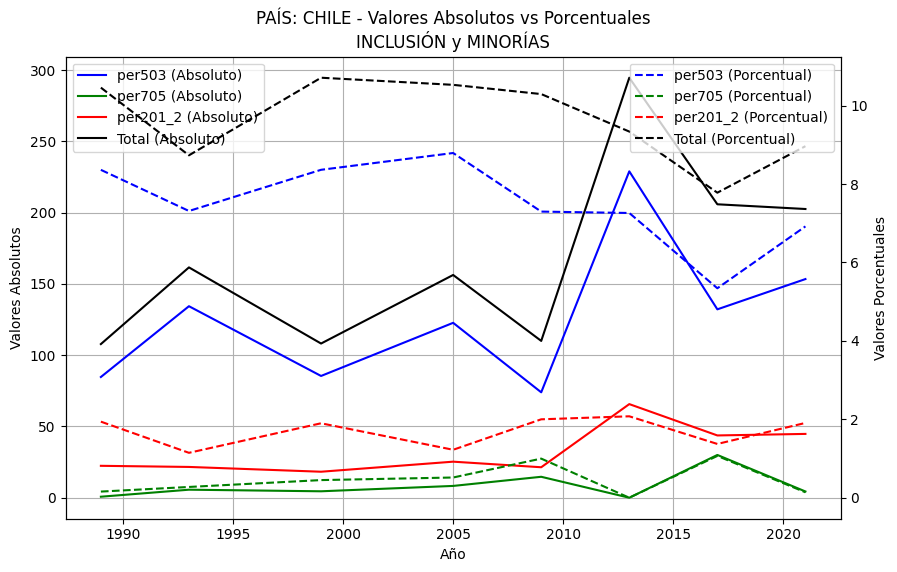

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define variables for the columns
tema = "INCLUSIÓN y MINORÍAS"
col_1 = 'per503'
col_2 = 'per705'
col_3 = 'per201_2'

# Select columns from df_absolutos_Chile_ponderados and df_porcentual_Chile_ponderados
df_abs_Chile_inclymin = df_absolutos_Chile_ponderados[['agno', col_1, col_2, col_3]].copy()
df_porcentual_Chile_inclymin = df_porcentual_Chile_ponderados[['agno', col_1, col_2, col_3]].copy()

# Add a new column 'Total' with the sum of columns in both datasets
df_abs_Chile_inclymin['Total'] = df_abs_Chile_inclymin[col_1] + df_abs_Chile_inclymin[col_2] + df_abs_Chile_inclymin[col_3]
df_porcentual_Chile_inclymin['Total'] = df_porcentual_Chile_inclymin[col_1] + df_porcentual_Chile_inclymin[col_2] + df_porcentual_Chile_inclymin[col_3]

# Create a figure and axis for the absolute values
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the absolute values on the left axis
ax1.plot(df_abs_Chile_inclymin['agno'], df_abs_Chile_inclymin[col_1], label=f"{col_1} (Absoluto)", color='b')
ax1.plot(df_abs_Chile_inclymin['agno'], df_abs_Chile_inclymin[col_2], label=f"{col_2} (Absoluto)", color='g')
ax1.plot(df_abs_Chile_inclymin['agno'], df_abs_Chile_inclymin[col_3], label=f"{col_3} (Absoluto)", color='r')
ax1.plot(df_abs_Chile_inclymin['agno'], df_abs_Chile_inclymin['Total'], label=f"Total (Absoluto)", color='k')

ax1.set_xlabel('Año')
ax1.set_ylabel('Valores Absolutos')
ax1.set_title(f'PAÍS: CHILE - Valores Absolutos vs Porcentuales\n{tema}')
ax1.grid(True)
ax1.legend(loc="upper left")

# Create a second y-axis to plot the porcentual values
ax2 = ax1.twinx()

# Plot the porcentual values on the right axis
ax2.plot(df_porcentual_Chile_inclymin['agno'], df_porcentual_Chile_inclymin[col_1], label=f"{col_1} (Porcentual)", linestyle='--', color='b')
ax2.plot(df_porcentual_Chile_inclymin['agno'], df_porcentual_Chile_inclymin[col_2], label=f"{col_2} (Porcentual)", linestyle='--', color='g')
ax2.plot(df_porcentual_Chile_inclymin['agno'], df_porcentual_Chile_inclymin[col_3], label=f"{col_3} (Porcentual)", linestyle='--', color='r')
ax2.plot(df_porcentual_Chile_inclymin['agno'], df_porcentual_Chile_inclymin['Total'], label=f"Total (Porcentual)", linestyle='--', color='k')

ax2.set_ylabel('Valores Porcentuales')

# Add legends for the second axis
ax2.legend(loc="upper right")

# Show the plot
plt.show()


<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per503.png" alt="" width="450">
  <img src="../assets/per705.png" alt="" width="450"></div>
</div>
<img src="../assets/per201_2.png" alt="" width="500">

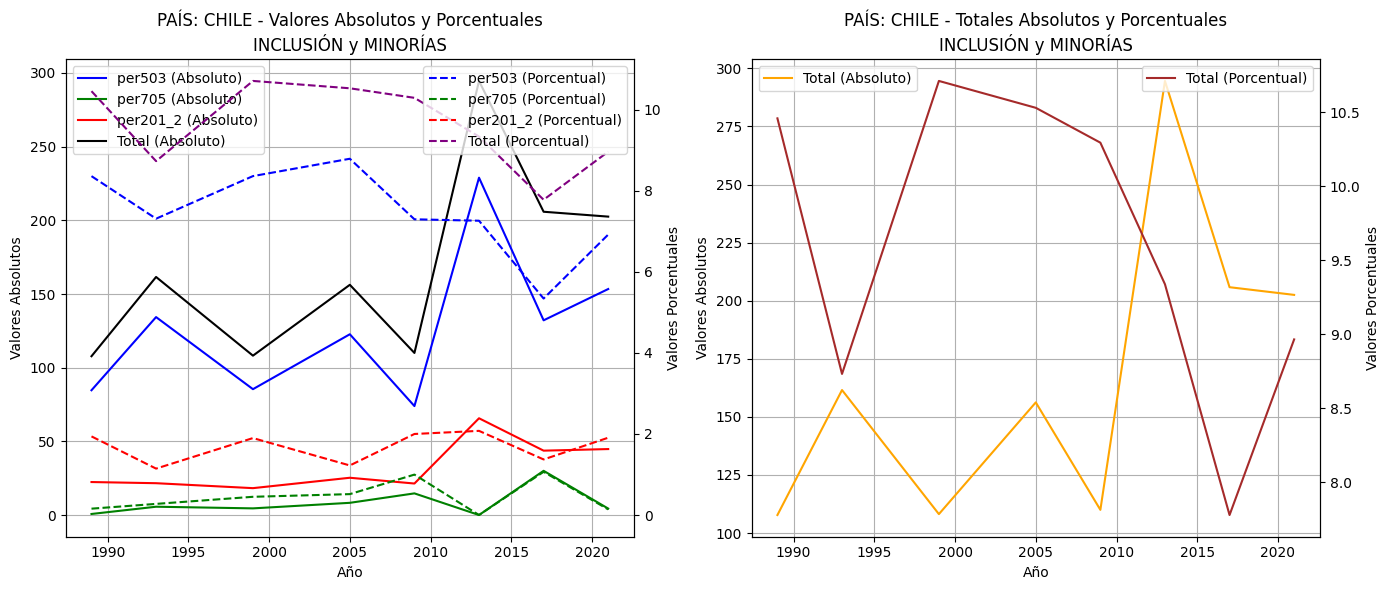

In [34]:
# Define variables for the columns
tema = "INCLUSIÓN y MINORÍAS"
col_1 = 'per503'
col_2 = 'per705'
col_3 = 'per201_2'

# Select columns from df_absolutos_Chile_ponderados and df_porcentual_Chile_ponderados
df_abs_Chile_inclymin = df_absolutos_Chile_ponderados[['agno', col_1, col_2, col_3]].copy()
df_porcentual_Chile_inclymin = df_porcentual_Chile_ponderados[['agno', col_1, col_2, col_3]].copy()

# Add a new column 'Total' with the sum of columns in both datasets
df_abs_Chile_inclymin['Total'] = df_abs_Chile_inclymin[col_1] + df_abs_Chile_inclymin[col_2] + df_abs_Chile_inclymin[col_3]
df_porcentual_Chile_inclymin['Total'] = df_porcentual_Chile_inclymin[col_1] + df_porcentual_Chile_inclymin[col_2] + df_porcentual_Chile_inclymin[col_3]

# Create subplots (2 columns, 1 row) with shared x-axis
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(14, 6))

# ----------------- Primer gráfico: valores absolutos y porcentuales -----------------

# Plot the absolute values on the left axis
ax1.plot(df_abs_Chile_inclymin['agno'], df_abs_Chile_inclymin[col_1], label=f"{col_1} (Absoluto)", color='b')  # Azul
ax1.plot(df_abs_Chile_inclymin['agno'], df_abs_Chile_inclymin[col_2], label=f"{col_2} (Absoluto)", color='g')  # Verde
ax1.plot(df_abs_Chile_inclymin['agno'], df_abs_Chile_inclymin[col_3], label=f"{col_3} (Absoluto)", color='r')  # Rojo
# Cambié el color de la línea de Total Absoluto a un color distinto para evitar colisión
ax1.plot(df_abs_Chile_inclymin['agno'], df_abs_Chile_inclymin['Total'], label=f"Total (Absoluto)", color='black')  # Negro

ax1.set_xlabel('Año')
ax1.set_ylabel('Valores Absolutos')
ax1.set_title(f'PAÍS: CHILE - Valores Absolutos y Porcentuales\n{tema}')
ax1.grid(True)
ax1.legend(loc="upper left")

# Create a second y-axis for the porcentual values
ax2 = ax1.twinx()
ax2.plot(df_porcentual_Chile_inclymin['agno'], df_porcentual_Chile_inclymin[col_1], label=f"{col_1} (Porcentual)", linestyle='--', color='b')  # Azul
ax2.plot(df_porcentual_Chile_inclymin['agno'], df_porcentual_Chile_inclymin[col_2], label=f"{col_2} (Porcentual)", linestyle='--', color='g')  # Verde
ax2.plot(df_porcentual_Chile_inclymin['agno'], df_porcentual_Chile_inclymin[col_3], label=f"{col_3} (Porcentual)", linestyle='--', color='r')  # Rojo
# Cambié el color de la línea de Total Porcentual a un color diferente
ax2.plot(df_porcentual_Chile_inclymin['agno'], df_porcentual_Chile_inclymin['Total'], label=f"Total (Porcentual)", linestyle='--', color='purple')  # Púrpura

ax2.set_ylabel('Valores Porcentuales')
ax2.legend(loc="upper right")

# ----------------- Segundo gráfico: sólo los Totales -----------------

# En el segundo gráfico, se usarán colores diferentes para los Totales (no necesariamente los mismos)
# Usar color diferente para el Total Absoluto y el Total Porcentual

# Plot the "Total" lines for both datasets in the second subplot
ax3.plot(df_abs_Chile_inclymin['agno'], df_abs_Chile_inclymin['Total'], label=f"Total (Absoluto)", color='orange')  # Naranja para total absoluto
ax3.set_xlabel('Año')
ax3.set_ylabel('Valores Absolutos')
ax3.grid(True)

# Create a second y-axis for the porcentual "Total" line
ax4 = ax3.twinx()
ax4.plot(df_porcentual_Chile_inclymin['agno'], df_porcentual_Chile_inclymin['Total'], label=f"Total (Porcentual)", color='brown')  # Marrón para total porcentual
ax4.set_ylabel('Valores Porcentuales')

# Set titles and legends for the second subplot
ax3.set_title(f'PAÍS: CHILE - Totales Absolutos y Porcentuales\n{tema}')
ax3.legend(loc="upper left")
ax4.legend(loc="upper right")

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per503.png" alt="" width="450">
  <img src="../assets/per705.png" alt="" width="450"></div>
</div>
<img src="../assets/per201_2.png" alt="" width="500">"""
display(Markdown(texto_md))

# Show the plot
plt.tight_layout()  # Adjust layout to fit both plots
plt.show()


In [ ]:
# Display the first few rows of the DataFrame
df.head()

In [ ]:
# Corrige nombre de Se
# Count the number of changes
count_changes = df.loc[df['candidatename'].notna() & df['candidatename'].str.contains('Piñera'), 'candidatename'].count()

# Replace the values
df.loc[df['candidatename'].notna() & df['candidatename'].str.contains('Piñera'), 'candidatename'] = 'Sebastián Piñera Echeñique'

# Print the number of changes
print(f"Number of changes: {count_changes}")

#### Crear campo 'agno' para registrar el año del programa de gobierno

In [4]:
# Insert column 'agno' into the dataframe, of type int, to the right of column 'date'
df.insert(df.columns.get_loc('date') + 1, 'agno', df['edate'].str[-4:].astype(int))

# List unique values of new column 'agno'
unique_agno_values = df['agno'].unique()
#print(unique_agno_values)

In [ ]:
# cargar Analytical_Data
df_AD = pd.read_excel('data/Analytical_Data.xlsx')
df_AD.head()


In [6]:
# Create a list of column names that begin with 'per' and have a digit in position 4
per_columns = ['countryname', 'candidatename', 'agno', 'presvote'] + [col for col in df.columns if col.startswith('per') and col[3].isdigit()]
#per_columns

#### PROMEDIO PONDERADO: en 'df' filtramos registros de Chile, separamos por año de elección y calculamos valores representativos basados en el promedio ponderado por el % obtenido en la elección presidencial (presvote)

In [ ]:
# Filter df by 'countryname' == 'Chile'
df_Chile = df[df['countryname'] == 'Chile']

df_Chile = df_Chile.sort_values(by='agno')

# Create a list of column names that begin with 'per' and have a digit in position 4
per_columns_4digit = [col for col in df.columns if col.startswith('per') and col[3].isdigit()]

# Group by column 'agno' and calculate the weighted average of each column in 'per_columns_4digit' using column 'presvote' as weights
df_Chile_ponderado = df_Chile.groupby('agno').apply(
    lambda x: pd.Series({col: np.average(x[col], weights=x['presvote']) for col in per_columns_4digit})
).reset_index()

# Display the results
df_Chile_ponderado

#### INCLUSIÓN Y MINORÍAS (503, 705, 201_2) 

In [ ]:
# Define variables for the columns
tema = "INCLUSIÓN y MINORÍAS"
col_1 = 'per503'
col_2 = 'per705'
col_3 = 'per201_2'

# Select columns from df_Chile_ponderado
df_Chile_inclymin = df_Chile_ponderado[['agno', col_1, col_2, col_3]]

# Add a new column 'Total' with the sum of columns
df_Chile_inclymin['Total'] = df_Chile_inclymin[col_1] + df_Chile_inclymin[col_2] + df_Chile_inclymin[col_3]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_inclymin.columns[df_Chile_inclymin.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_col_3 = f"{col_3} ({detalle_dominio_dict.get(col_3, 'No Info')})"
label_total = f"Total ({col_1} + {col_2} + {col_3})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per503.png" alt="" width="450">
  <img src="../assets/per705.png" alt="" width="450"></div>
</div>
<img src="../assets/per201_2.png" alt="" width="500">"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin[col_1], label=label_col_1)
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin[col_2], label=label_col_2)
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin[col_3], label=label_col_3)
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE\n{tema}')
plt.legend()
plt.grid(True)
plt.show()


#### Comentario a Inclusión y Minorías:
* La línea del Total muestra que el aspecto "Inclusión y Minorías" ha ido disminuyendo porcentualmente en las menciones de los programas de gobierno entre 1989 y 2021. Sin embargo es el segundo más importante de los aspectos en análisis, lo cual se puede apreciar en el gráfico resumen.

#### ORDEN y CORRUPCIÓN (605_1, -605_2, per304)

In [ ]:
# Define variables for the columns
tema = "ORDEN Y CORRUPCIÓN"
col_1 = 'per605_1'
col_2 = 'per605_2'
col_3 = 'per304'

# Select columns from df_Chile_ponderado
df_Chile_orden = df_Chile_ponderado[['agno', col_1, col_2, col_3]]

# Add a new column 'Total' with the sum of columns
df_Chile_orden['Total'] = df_Chile_orden[col_1] - df_Chile_orden[col_2] + df_Chile_orden[col_3]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_orden.columns[df_Chile_orden.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_col_3 = f"{col_3} ({detalle_dominio_dict.get(col_3, 'No Info')})"
label_total = f"Total ({col_1} - {col_2} + {col_3})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per605_1-per605_2.png" alt="" width="450"></div>
  <img src="../assets/per304.png" alt="" width="450">
</div>

"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_orden['agno'], df_Chile_orden[col_1], label=label_col_1)
plt.plot(df_Chile_orden['agno'], df_Chile_orden[col_2], label=label_col_2)
plt.plot(df_Chile_orden['agno'], df_Chile_orden[col_3], label=label_col_3)
plt.plot(df_Chile_orden['agno'], df_Chile_orden['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE\n{tema} ({col_1} - {col_2} + {col_3})')
plt.legend()
plt.grid(True)
plt.show()


#### Comentario a ORDEN Y CORRUPCIÓN
* Se puede apreciar claramente la importancia que ha ido adquiriendo este aspecto en Chile, variando desde 1,1 en 1989 a 5,2 en 2021 (4.8 veces). Esto ha sido impulsado por un fuerte aumento de las menciones a dotar de mayores recursos a las policías y mayor rigurosidad en los tribunales. Debe mencionarse la disminución de las menciones a la corrupción política y al abuso de este poder.  

#### MEDIO AMBIENTE Y SOSTENIBILIDAD (501, 416_2)

In [ ]:
# Define variables for the columns
tema = "MEDIO AMBIENTE Y SOSTENIBILIDAD"
col_1 = 'per501'
col_2 = 'per416_2'

# Select columns from df_Chile_ponderado
df_Chile_medioambiente = df_Chile_ponderado[['agno', col_1, col_2]]

# Add a new column 'Total' with the sum of columns
df_Chile_medioambiente['Total'] = df_Chile_medioambiente[col_1] + df_Chile_medioambiente[col_2]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_medioambiente.columns[df_Chile_medioambiente.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_total = f"Total ({col_1} + {col_2})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per501.png" alt="" width="550"></div>
  <img src="../assets/per416_2.png" alt="" width="450">
</div>
"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_medioambiente['agno'], df_Chile_medioambiente[col_1], label=label_col_1)
plt.plot(df_Chile_medioambiente['agno'], df_Chile_medioambiente[col_2], label=label_col_2)
plt.plot(df_Chile_medioambiente['agno'], df_Chile_medioambiente['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE\n{tema} ({col_1} + {col_2})')
plt.legend()
plt.grid(True)
plt.show()


#### Comentario a MEDIO AMBIENTE Y SOSTENIBILIDAD
* Este es el aspecto que evoluciona más fuerte de todos, y en todos sus componentes. 

#### PUEBLOS ORIGINARIOS (607_3, 608_3)

In [ ]:
# Define variables for the columns
tema = "PUEBLOS ORIGINARIOS"
col_1 = 'per607_3'
col_2 = 'per608_3'

# Select columns from df_Chile_ponderado
df_Chile_poriginarios = df_Chile_ponderado[['agno', col_1, col_2]]

# Add a new column 'Total' with the sum of columns
df_Chile_poriginarios['Total'] = df_Chile_poriginarios[col_1] - df_Chile_poriginarios[col_2]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_poriginarios.columns[df_Chile_poriginarios.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_total = f"Total ({col_1} - {col_2})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per607_3.png" alt="" width="550"></div>
  <img src="../assets/per608_3.png" alt="" width="550">
</div>
"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_poriginarios['agno'], df_Chile_poriginarios[col_1], label=label_col_1)
plt.plot(df_Chile_poriginarios['agno'], df_Chile_poriginarios[col_2], label=label_col_2)
plt.plot(df_Chile_poriginarios['agno'], df_Chile_poriginarios['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE\n{tema} ({col_1} - {col_2})')
plt.legend()
plt.grid(True)
plt.show()


#### Comentario a PUEBLOS ORIGINARIOS
* Luego de tener un crecimiento fuerte y sostenido entre 1989 y 2008, PUEBLOS ORIGINARIOS ha ido perdiendo fuertemente participación en las menciones en los programas de gobierno. 

#### DERECHOS HUMANOS (per201_1, per201_2)

In [ ]:
# Define variables for the columns
tema = "DERECHOS HUMANOS"
col_1 = 'per201_1'
col_2 = 'per201_2'

# Select columns from df_Chile_ponderado
df_Chile_hr = df_Chile_ponderado[['agno', col_1, col_2]]

# Add a new column 'Total' with the sum of columns
df_Chile_hr['Total'] = df_Chile_hr[col_1] + df_Chile_hr[col_2]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_hr.columns[df_Chile_hr.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
label_total = f"Total ({col_1} + {col_2})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per201_1_2.png" alt="" width="550"></div>
</div>
"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_hr['agno'], df_Chile_hr[col_1], label=label_col_1)
plt.plot(df_Chile_hr['agno'], df_Chile_hr[col_2], label=label_col_2)
plt.plot(df_Chile_hr['agno'], df_Chile_hr['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE\n{tema} ({col_1} + {col_2})')
plt.legend()
plt.grid(True)
plt.show()


#### Comentario a DERECHOS HUMANOS:
* Este aspecto ha ido perdiendo participación desde 1989 a 2021, pero crece en forma sostenida desde 2005.

#### INMIGRACIÓN (602_2, 607_1)

In [ ]:
# Define variables for the columns
tema = "INMIGRACIÓN"
col_1 = 'per602_2'
col_2 = 'per607_1'
#col_3 = 'per201_2'

# Select columns from df_Chile_ponderado
df_Chile_inmigracion = df_Chile_ponderado[['agno', col_1, col_2]] #col_3

# Add a new column 'Total' with the sum of columns
df_Chile_inmigracion['Total'] = df_Chile_inmigracion[col_1] + df_Chile_inmigracion[col_2] #+ df_Chile_inmigracion[col_3]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_inmigracion.columns[df_Chile_inmigracion.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
#label_col_3 = f"{col_3} ({detalle_dominio_dict.get(col_3, 'No Info')})"
label_total = f"Total ({col_1} + {col_2})" # + {col_3})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per602_2.png" alt="" width="550"></div>
  <img src="../assets/per607_1.png" alt="" width="550">
</div>
"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_inmigracion['agno'], df_Chile_inmigracion[col_1], label=label_col_1)
plt.plot(df_Chile_inmigracion['agno'], df_Chile_inmigracion[col_2], label=label_col_2)
#plt.plot(df_Chile_inmigracion['agno'], df_Chile_inmigracion[col_3], label=label_col_3)
plt.plot(df_Chile_inclymin['agno'], df_Chile_inmigracion['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE\n{tema}')
plt.legend()
plt.grid(True)
plt.show()


#### Comentario a INMIGRACIÓN
* Este aspecto está definido por menciones en favor de la inmigración. Llama la atención el repunte fuerte en 2008 y luego la baja brusca en 2017, posiblemente por la asociación de la inmigración con la seguridad. 

#### MORAL TRADICIONAL (603, 604)

In [ ]:
# Define variables for the columns
tema = "MORAL TRADICIONAL"
col_1 = 'per603'
col_2 = 'per604'
#col_3 = 'per201_2'

# Select columns from df_Chile_ponderado
df_Chile_moral = df_Chile_ponderado[['agno', col_1, col_2]] #col_3

# Add a new column 'Total' with the sum of columns
df_Chile_moral['Total'] = df_Chile_moral[col_1] - df_Chile_moral[col_2] #+ df_Chile_moral[col_3]

# Get the column names excluding 'agno'
columns_to_lookup = df_Chile_moral.columns[df_Chile_moral.columns != 'agno']
detalle_dominio_dict = {}

# Loop through the columns and get the corresponding 'Detalle_Dominio' from 'df_AD'
for col in columns_to_lookup:
    detalle_dominio = df_AD.loc[df_AD['Variable_per'] == col, 'Detalle_Dominio'].values
    if len(detalle_dominio) > 0:
        detalle_dominio_dict[col] = detalle_dominio[0]

# Update the plot labels with details from the dictionary
label_col_1 = f"{col_1} ({detalle_dominio_dict.get(col_1, 'No Info')})"
label_col_2 = f"{col_2} ({detalle_dominio_dict.get(col_2, 'No Info')})"
#label_col_3 = f"{col_3} ({detalle_dominio_dict.get(col_3, 'No Info')})"
label_total = f"Total ({col_1} - {col_2})" # + {col_3})"

texto_md = """<div style="display: flex; justify-content: space-between;">
  <img src="../assets/per603_604.png" alt="" width="550"></div>
</div>
"""
display(Markdown(texto_md))

# Plot columns
plt.figure(figsize=(10, 6))
plt.plot(df_Chile_moral['agno'], df_Chile_moral[col_1], label=label_col_1)
plt.plot(df_Chile_moral['agno'], df_Chile_moral[col_2], label=label_col_2)
#plt.plot(df_Chile_moral['agno'], df_Chile_moral[col_3], label=label_col_3)
plt.plot(df_Chile_moral['agno'], df_Chile_moral['Total'], label=label_total)

plt.xlabel('Año')
plt.ylabel('Ponderado')
plt.title(f'PAÍS: CHILE\n{tema}')
plt.legend()
plt.grid(True)
plt.show()


#### Comentario a MORAL TRADICIONAL: 
* Puede observarse como a partir de 2005 comienzan a ser mencionados los aspecto relacionados con el divorcio, el aborto y la concepción de familias con composición diferente a la tradicional en Chile.

#### GRÁFICO RESUMEN

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

# Plot
plt.plot(df_Chile_poriginarios['agno'], df_Chile_poriginarios['Total'], label='Pueblos Originarios')
plt.plot(df_Chile_orden['agno'], df_Chile_orden['Total'], label='Orden y Corrupción')
plt.plot(df_Chile_medioambiente['agno'], df_Chile_medioambiente['Total'], label='Medio Ambiente y Sostenibilidad')
plt.plot(df_Chile_inclymin['agno'], df_Chile_inclymin['Total'], label='Inclusión y Minorías')
plt.plot(df_Chile_hr['agno'], df_Chile_hr['Total'], label='Derechos Humanos')
plt.plot(df_Chile_inmigracion['agno'], df_Chile_inmigracion['Total'], label='Inmigración')
plt.plot(df_Chile_moral['agno'], df_Chile_moral['Total'], label='Moral Tradicional')

# Etiquetas al final de cada línea
plt.annotate('Pueblos Originarios', xy=(df_Chile_poriginarios['agno'].values[-1], df_Chile_poriginarios['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Orden y Corrupción', xy=(df_Chile_orden['agno'].values[-1], df_Chile_orden['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Medio Ambiente y Sostenibilidad', xy=(df_Chile_medioambiente['agno'].values[-1], df_Chile_medioambiente['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Inclusión y Minorías', xy=(df_Chile_inclymin['agno'].values[-1], df_Chile_inclymin['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Derechos Humanos', xy=(df_Chile_hr['agno'].values[-1], df_Chile_hr['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Inmigración', xy=(df_Chile_inmigracion['agno'].values[-1], df_Chile_inmigracion['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')
plt.annotate('Moral Tradicional', xy=(df_Chile_moral['agno'].values[-1], df_Chile_moral['Total'].values[-1]), xytext=(5, 0), textcoords='offset points')

# Configuración del gráfico
plt.xlabel('Año')
plt.ylabel('Total Ponderado')
plt.title('Comparación de Diferentes Aspectos en Chile')
plt.legend().set_visible(False)  # Oculta la leyenda ya que las etiquetas están al final de las líneas
plt.grid(True)

plt.show()


#### COMENTARIO GENERAL:
* Las conclusiones mencionadas en los gráficos individuales (resumidos en este cuadro comparativo), son consistentes con lo que se observa en Chile. Es posible que se pueda incorporar más variables a los aspectos mencionados de manera de tener una mejor representación, como también agregar más aspectos para analizar (Derechos Sociales, Economía, Sistema Político y otros).
* 
* En resumen, en base a este análisis, es posible sostener que el dataset habla de Chile como Chile es.

#### CHILE: TODOS LOS DOMINIOS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty dataframe to store the results
df_Chile_dom = pd.DataFrame()

# Loop through each unique 'Dominio' in 'df_AD'
for dominio in df_AD['Dominio'].unique():
    # Create list 'columnas_per' with values of 'Variable_per' for that 'Dominio' considering only columns with name length == 6
    columnas_per = df_AD[(df_AD['Dominio'] == dominio) & (df_AD['Variable_per'].str.len() == 6)]['Variable_per'].tolist()
    
    # Sum the columns with names in 'columnas_per' for each 'agno' in 'df_Chile_ponderado'
    df_Chile_ponderado['tot_dom'] = df_Chile_ponderado[columnas_per].sum(axis=1)
    
    # Create a temporary dataframe with 'agno', 'Dominio', and 'tot_dom'
    temp_df = df_Chile_ponderado[['agno', 'tot_dom']].copy()
    temp_df['Dominio'] = dominio
    
    # Append the temporary dataframe to 'df_Chile_dom'
    df_Chile_dom = pd.concat([df_Chile_dom, temp_df], ignore_index=True)
    
    # Reset 'columnas_per' for the next loop iteration
    columnas_per = []

# Merge 'df_Chile_dom' with 'df_AD' to get 'Nombre_Dominio'
df_Chile_dom = df_Chile_dom.merge(df_AD[['Dominio', 'Nombre_Dominio']].drop_duplicates(), on='Dominio', how='left')

# Plot the dataframe 'df_Chile_dom' with 'agno' on the horizontal axis and 'tot_dom' on the vertical axis
plt.figure(figsize=(12, 8))

for dominio in df_Chile_dom['Dominio'].unique():
    subset = df_Chile_dom[df_Chile_dom['Dominio'] == dominio]
    
    # Plot the line for each 'Dominio'
    plt.plot(subset['agno'], subset['tot_dom'], label=subset['Nombre_Dominio'].iloc[0])
    
    # Check if 'Dominio' is 'Social Groups' or 'Freedom and Democracy' and place the label at the end
    if dominio in ['Domain_7', 'Domain_1']:
        plt.text(subset['agno'].iloc[-1], subset['tot_dom'].iloc[-1], subset['Nombre_Dominio'].iloc[0], 
                 fontsize=9, ha='left', va='center')
    else:
        # Place the label at the start for other dominios
        plt.text(subset['agno'].iloc[0], subset['tot_dom'].iloc[0], subset['Nombre_Dominio'].iloc[0], 
                 fontsize=9, ha='right', va='center')

# Configuración del gráfico
plt.xlabel('Año')
plt.ylabel('Total Dominio')
plt.title('Total Dominio por Año en Chile')
plt.legend()
plt.grid(True)
plt.show()
